2.1

In [2]:
import spacy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_sm")
doc = nlp(open('reddit-questions.10k.f22.txt', encoding='utf-8').read())
list_of_words = {}
for token in doc:
    if not token.is_punct and not token.like_url:
        word = token.lemma
        if word in list_of_words:
            list_of_words[word] += 1
        else:
            list_of_words[word]=1

In [3]:
list_of_words1 = {}
with open('wiki-bios.10k.f22.txt', encoding="utf-8") as t:
        for line in t:
            doc1 = nlp(line)
            for token in doc1:
                if not token.is_punct and not token.like_url:
                    word = token.lemma
                    if word in list_of_words1:
                        list_of_words1[word] += 1
                    else:
                        list_of_words1[word]=1


In [5]:
stopwords = []
count = 0
count1 = 0
upper = 0
upper1 = 0
char = 0
char1 = 0
with open('stoplist.txt', encoding="utf-8") as t:
        for line in t:
            line=line.replace('\n', '')
            stopwords.append(line)
            
lst=[]
lst1=[]
for token in doc:
    for i in range(len(str(token))):
        if str(token)[i].isupper():
            upper+=1
    if str(token).lower() == '\n':
        continue
    elif str(token).lower() not in stopwords:    
        lst.append(str(token).lower())
    else:
        count+=1
    char+=len(str(token).lower())
        
for token in doc1:
    for i in range(len(str(token))):
        if str(token)[i].isupper():
            upper1+=1
    if str(token).lower() == '\n':
        continue
    elif str(token).lower() not in stopwords:    
        lst1.append(str(token).lower())
    else:
        count1+=1
    char1+=len(str(token).lower())

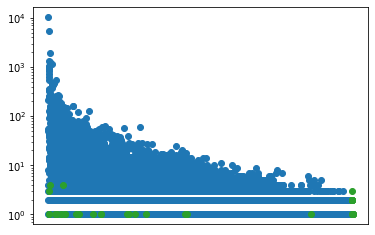

In [21]:
from matplotlib import pyplot
w = Counter(lst)
w1 = Counter(lst1)
#fig = plt.figure()
#ax = fig.subplot(1, 1, 1)
plt.scatter(w.keys(), w.values(), c = '#1f77b4')
plt.scatter(w1.keys(), w1.values(), c = '#2ca02c')
pyplot.yscale('log')
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.show()

the distribution of reddit questions do look like power-law distribution, but the distribution of wiki bios doesn't. The two distributions look different, as the frequency of the words in the wiki-bio seems very consistent.

2.2

In [22]:
#a)
print('reddit: ', count/sum(list_of_words.values()))
print('wiki: ', count1/sum(list_of_words1.values()))

#b)
print('reddit: ', upper/char)
print('wiki: ', upper1/char1)

#c)
print('reddit: ', char/len(list_of_words))
print('wiki: ', char1/len(list_of_words1))

#d)
pron = 0
pron1 = 0
noun=0
adjective=0
verb=0
adverb=0
noun1=0
adjective1=0
verb1=0
adverb1=0

n={}
n1={}
v={}
v1={}
adj={}
adj1={}
for token in doc:
    if token.pos_ == "PRON":
        pron+=1
    elif token.pos_ == "NOUN":
        noun+=1
        if token not in n:
            n[token]=1
        else:
            n[token]+=1
    elif token.pos_ == "ADJ":
        adjective+=1
        if token not in adj:
            adj[token]=1
        else:
            adj[token]+=1
    elif token.pos_ == "VERB":
        verb+=1
        if token not in v:
            v[token]=1
        else:
            v[token]+=1
    elif token.pos_ == "ADV":
        adverb+=1
for token in doc1:
    if token.pos_ == "PRON":
        pron1+=1
    elif token.pos_ == "NOUN":
        noun1+=1
        if token not in n1:
            n1[token]=1
        else:
            n1[token]+=1
    elif token.pos_ == "ADJ":
        adjective1+=1
        if token not in adj1:
            adj1[token]=1
        else:
            adj1[token]+=1
    elif token.pos_ == "VERB":
        verb1+=1
        if token not in v1:
            v1[token]=1
        else:
            v1[token]+=1
    elif token.pos_ == "ADV":
        adverb1+=1
print('reddit nouns: ', noun/len(list_of_words))
print('wiki nouns:', noun1/len(list_of_words1))
print('reddit adjectives: ', adjective/len(list_of_words))
print('wiki adjectives:', adjective1/len(list_of_words1))
print('reddit verbs: ', verb/len(list_of_words))
print('wiki verbs:', verb1/len(list_of_words1))
print('reddit adverbs: ', adverb/len(list_of_words))
print('wiki adverbs:', adverb1/len(list_of_words1))
print('reddit pronouns: ', pron/len(list_of_words))
print('wiki pronouns:', pron1/len(list_of_words1))

#e)
d = Counter(n)
d1 = Counter(v)
d2 = Counter(adj)
print('reddit top 10 nouns:')
for k,v in d.most_common(10):
     print ('%s ' % (k))
print('reddit top 10 verbs:')
for k,v in d1.most_common(10):
     print ('%s ' % (k))
print('reddit top 10 adjs:')
for k,v in d2.most_common(10):
     print ('%s ' % (k))

d = Counter(n1)
d1 = Counter(v1)
d2 = Counter(adj1)
print('wiki top 10 nouns:')
for k,v in d.most_common(10):
     print ('%s ' % (k))
print('wiki top 10 verbs:')
for k,v in d1.most_common(10):
     print ('%s ' % (k))
print('wiki top 10 adjs:')
for k,v in d2.most_common(10):
     print ('%s ' % (k))

reddit:  0.5540820463266859
wiki:  5.767976063786716e-06
reddit:  0.028514978157275713
wiki:  0.0738255033557047
reddit:  75.3870180079357
wiki:  0.0015350696447704608
reddit nouns:  3.0983823379794484
wiki nouns: 5.1512404186928214e-05
reddit adjectives:  1.2343066436056567
wiki adjectives: 2.0604961674771284e-05
reddit verbs:  2.233492725607895
wiki verbs: 1.5453721256078465e-05
reddit adverbs:  0.7210296062671686
wiki adverbs: 0.0
reddit pronouns:  3.0288940889205413
wiki pronouns: 2.0604961674771284e-05
reddit top 10 nouns:
strangers 
elevator 
floor 
askreddit 
thing 
copy 
pastes 
bots 
People 
rules 
reddit top 10 verbs:
riding 
feel 
read 
have 
broken 
break 
learned 
speak 
accused 
do 
reddit top 10 adjs:
frustrating 
whole 
good 
new 
creepiest 
first 
second 
durable 
sure 
offensive 
wiki top 10 nouns:
heart 
attack 
day 
family 
burial 
ground 
city 
sons 
daughters 
son 
wiki top 10 verbs:
died 
buried 
survived 
wiki top 10 adjs:
12th 
same 
Walled 
current 


3.

In [ ]:
import math
import numpy as np

lc = 0
li = [0,0,0,0,0]
wordlist = [' ',' ',' ',' ',' ']
words1 = {}
with open('wiki-bios.10k.f22.txt', encoding="utf-8") as t:
        for line in t:
            line=line.replace('\n', '')
            lc+=1
            if lc >10:
                break
            doc1 = nlp(line)
            for token in doc1:
                if not token.is_punct and not token.like_url:
                    word = token.lemma
                    word = str(word).lower()
                    if word in words1:
                        words1[word][lc-1] += 1
                    else:
                        words1[word]=[0,0,0,0,0,0,0,0,0,0]
                        words1[word][lc-1]=1
                        
words2=words1
for word in words2:
    words2[word] = 0
with open('wiki-bios.10k.f22.txt', encoding="utf-8") as t:
        for line in t:
            doc1 = nlp(line)
            for word in words1:
                if word in str(doc1):
                    words2[word]+=1
                    
for word in words1:
    for i in range(10):
        tfidf = math.log(words1[word][i]+1) * (1 + math.log(10000/words2[word]))
        if tfidf > min(li):
            wordlist[li.index(min(li))] = word
            li[li.index(min(li))] = tfidf
wordlist

We could deduct what might be happening from the reuslts such as "fight" and "jury" so I would say it is relatively informative, but perhaps not a very good summary of a document since there are only 5 words. If we select more words with high TF-IDF, we may get a good summary

2.4

What I found in a paper is to use log(abs(c)/cf(ti)), where c is a constant and cf denotes the count of categories where ti appears in at least one relavent document. This means the fewer are the categories in which aterm occurs, the greater is the discriminating power of the term. This might be more accurate than TF-IDF since it takes the meaning of the words into account instead of the word frequency.